In [1]:
import shutil

from robin.plotter.entities import KernelPlotter
from robin.supply.generator.entities import SupplyGenerator
from robin.supply.entities import Supply
from robin.supply.saver.entities import SupplySaver

from pathlib import Path

In [2]:
# Config files
supply_config_path = Path("../configs/supply_generator/supply_data_new.yaml")
generator_config_path = Path("../configs/supply_generator/config.yaml")
supply_generator_save_path = Path('../data/generator/supply_generator_example.yaml')


# Save paths
generator_save_path = Path(f'../data/generator/supply_dummy.yaml')

# Clean save paths directories
if Path(generator_save_path.parent).exists():
    shutil.rmtree(generator_save_path.parent)

Path(generator_save_path.parent).mkdir(parents=True)

# Clean save paths directories
if Path(supply_generator_save_path.parent).exists():
    shutil.rmtree(supply_generator_save_path.parent)

Path(supply_generator_save_path.parent).mkdir(parents=True)

In [3]:
seed = 21

if generator_config_path:
    generator = SupplyGenerator.from_yaml(path_config_supply=supply_config_path,
                                          path_config_generator=generator_config_path)

    generator.generate(file_name=generator_save_path,
                           n_services=4,
                           seed=seed)

    print(f'Number of service requests generated: {len(generator.generated_services)}')

Number of service requests generated: 4


In [4]:
supply_saver = SupplySaver(generator.generated_services)

supply_saver.to_yaml(output_path='../data/generator/supply_generator_example.yaml')

In [5]:
supply = Supply.from_yaml('../data/generator/supply_generator_example.yaml')

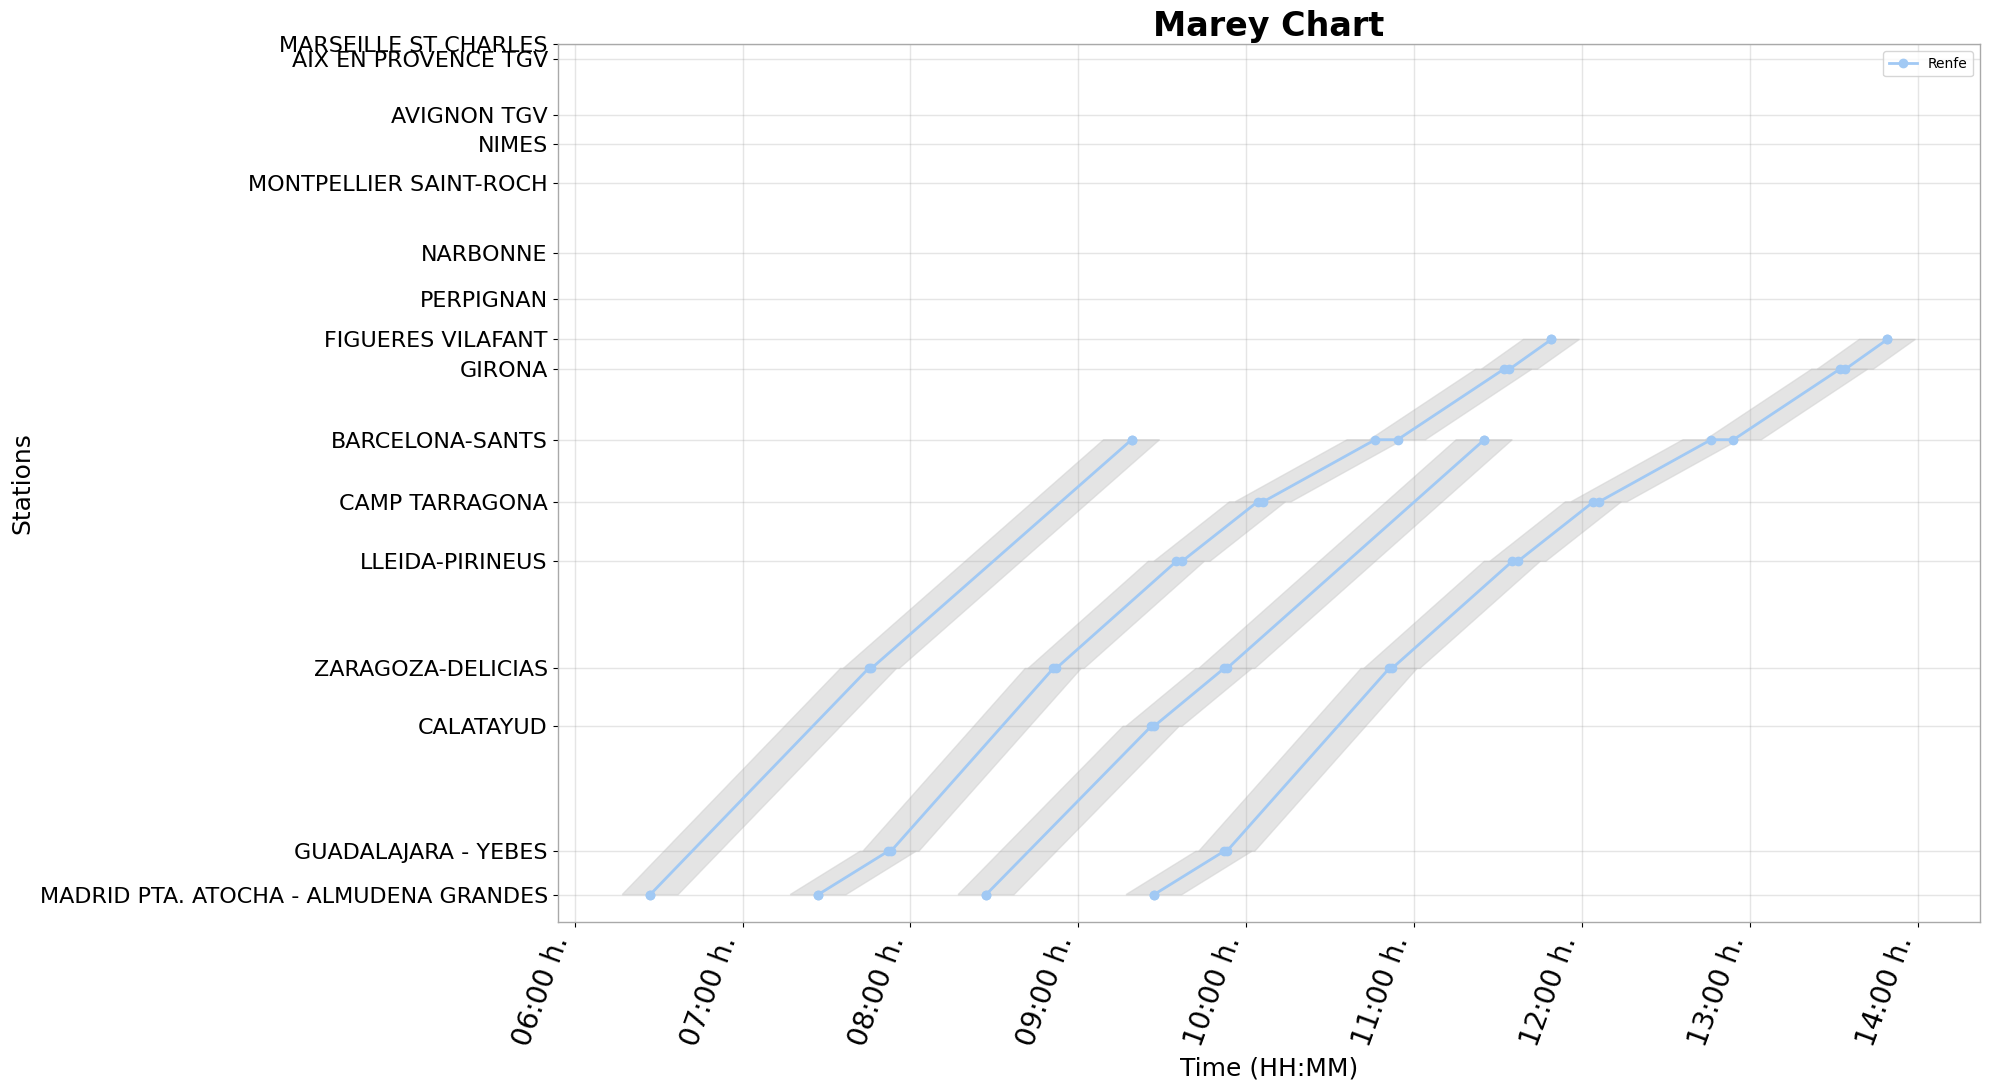

In [6]:
path_output_csv = '../data/test_case/output.csv'

kernel_plotter = KernelPlotter(
    path_output_csv=path_output_csv,
    path_config_supply=supply_generator_save_path,
)

kernel_plotter.plot_marey_chart(save_path='../reports/figures/', safety_gap=10)